# Маркетинговая аналитика развлекательного приложения Procrastinate Pro+



**Описание проекта:** Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с данными об их посещениях,
* выгрузка их покупок за этот период,
* рекламные расходы.

Необходимо выяснить:
* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.

**Цель исследования:** разобраться в причинах убытков и помочь компании выйти в плюс.

**Содержание**
    
    
1. [Изучение и предобработка данных](#open)
    
    
2. [Определение функций для исследования](#preproc)
     
    
3. [Исследовательский анализ данных](#pred)


4. [Маркетинг](#portr)


5. [Оценка окупаемости рекламы](#research)
   
    
6. [Общий вывод](#summary)

<a id="open"></a>
## 1. Изучение и предобработка данных

**Описание данных:**

В нашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о покупках, а costs_info_short.csv — информацию о расходах на рекламу.

Структура visits_info_short.csv
* User Id — уникальный идентификатор пользователя,
* Region — страна пользователя,
* Device — тип устройства пользователя,
* Channel — идентификатор источника перехода,
* Session Start — дата и время начала сессии,
* Session End — дата и время окончания сессии.

Структура orders_info_short.csv
* User Id — уникальный идентификатор пользователя,
* Event Dt — дата и время покупки,
* Revenue — сумма заказа.

Структура costs_info_short.csv
* Channel — идентификатор рекламного источника,
* Dt — дата проведения рекламной кампании,
* Costs — расходы на эту кампанию.


In [1]:
# Импортируем библиотеки

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
# Открываем данные файлов
try:  
    visits, orders, costs = ( 
    pd.read_csv('/datasets/visits_info_short.csv'),  # журнал сессий
    pd.read_csv('/datasets/orders_info_short.csv'),  # покупки
    pd.read_csv('/datasets/costs_info_short.csv')  # затраты на рекламу
    )
except:
    visits, orders, costs = ( 
    pd.read_csv('visits_info_short.csv'),  # журнал сессий
    pd.read_csv('orders_info_short.csv'),  # покупки
    pd.read_csv('costs_info_short.csv')  # затраты на рекламу
    )


In [3]:
# Изучаем таблицу визитов

display(visits.head(10))
visits.tail(10)
visits.sample(5)
visits.info()
visits.describe().T

# visits['Region'].unique()
# visits['Device'].unique()
# visits['Channel'].unique()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,count,mean,std,min,25%,50%,75%,max
User Id,"309,901.00","499,766,449,382.70","288,789,916,887.83","599,326.00","249,369,122,776.00","498,990,589,687.00","749,521,111,616.00","999,999,563,947.00"


In [4]:
# Изучаем таблицу покупок

display(orders.head(10))
orders.tail(10)
orders.sample(5)
orders.info()
orders.describe().T

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,count,mean,std,min,25%,50%,75%,max
User Id,"40,212.00","499,029,531,203.23","286,093,675,967.17","599,326.00","251,132,440,436.75","498,283,972,665.00","743,332,711,780.00","999,895,427,370.00"
Revenue,"40,212.00",5.37,3.45,4.99,4.99,4.99,4.99,49.99


In [5]:
# Изучаем таблицу затрат на рекламу

display(costs.head(10))
costs.tail(10)
costs.sample(5)
costs.info()
costs.describe().T

# costs['Channel'].unique()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.30
1,2019-05-02,FaceBoom,78.10
2,2019-05-03,FaceBoom,85.80
3,2019-05-04,FaceBoom,136.40
4,2019-05-05,FaceBoom,122.10
5,2019-05-06,FaceBoom,118.80
6,2019-05-07,FaceBoom,101.20
7,2019-05-08,FaceBoom,100.10
8,2019-05-09,FaceBoom,93.50
9,2019-05-10,FaceBoom,104.50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,count,mean,std,min,25%,50%,75%,max
costs,"1,800.00",58.61,107.74,0.80,6.50,12.29,33.60,630.00


In [6]:
# Переименуем колонки согласно змеиному стилю
visits.columns = visits.columns.str.replace(' ', '_').str.lower()
orders.columns = orders.columns.str.replace(' ', '_').str.lower()
costs.columns = costs.columns.str.replace(' ', '_').str.lower()

# Изменим некоректные типы данных

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
# costs['dt'] = pd.to_datetime(costs['dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.

### Вывод

Данные открыты и изучены. Пропусков не обнаружено. 

Названия колонок привели к нижнему регистру без пробелов. 

Некоректные типы данных:

* session_start привели к типу datetime
* session_end привели к типу datetime
* event_dt привели к типу datetime
* dt привели к текстовой дате без времени


<a id="preproc"></a>
## 2. Определение функций для исследования

Определим функции для создания профилей, расчёта удержания, конверсии, LTV и ROI: get_profiles(), get_retention(), get_conversion() и get_ltv().

In [7]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

#     # добавляем флаги для всех событий из event_names
#     for event in event_names:
#         if event in events['event_name'].unique():
#             profiles[event] = profiles['user_id'].isin(
#                 events.query('event_name == @event')['user_id'].unique()
#             )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [8]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [9]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [10]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI (исключая таким образом органических пользователей из анализа)
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

 Добавим функции для визуализации этих метрик — filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi().

In [11]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [12]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [13]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [14]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Вывод

Были определены функции для создания профилей, расчёта удержания, конверсии, LTV и ROI: get_profiles(), get_retention(), get_conversion() и get_ltv(), а также функция для визуализации этих метрик: filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi().

<a id="pred"></a>
## 3. Исследовательский анализ данных

Создадим пользовательские профили. Определим минимальную и максимальную дату привлечения пользователей.

In [15]:
profiles = get_profiles(visits, orders, costs)
print(profiles.head(5)) 

display(profiles.describe().T)

min_analysis_date = profiles['dt'].min() # минимальная дата привлечения пользователей
max_analysis_date = profiles['dt'].max()  # момент анализа (максимальная дата привлечения пользователей)
print()
print('Минимальная дата привлечения пользователей',min_analysis_date)
print('Максимальная дата привлечения пользователей',max_analysis_date)

    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True              1.09  
1  2019-07-09 2019-07-01  False              1.11  
2  2019-10-01 2019-10-01  False              0.00  
3  2019-08-22 2019-08-01  False              0.99  
4  2019-10-02 2019-10-01  False              0.23  


,count,mean,std,min,25%,50%,75%,max
user_id,"150,008.00","499,323,784,543.79","288,948,257,508.91","599,326.00","248,924,949,195.75","497,704,624,743.00","749,491,850,048.75","999,999,563,947.00"
acquisition_cost,"150,008.00",0.70,0.95,0.00,0.00,0.25,1.11,3.72



Минимальная дата привлечения пользователей 2019-05-01
Максимальная дата привлечения пользователей 2019-10-27


Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей, построив таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [16]:
reg_users = (profiles.groupby(['region']).agg({'user_id': 'nunique', 'payer': ['sum','mean']}).reset_index())
reg_users.columns = list(['Страна', 'Пользователей', 'Платящих', 'Доля платящих, %'])
display(reg_users.sort_values(by = 'Пользователей', ascending = False).style.format({'Доля платящих, %': '{:.2%}'}))


,Страна,Пользователей,Платящих,"Доля платящих, %"
3,United States,100002,6902,6.90%
2,UK,17575,700,3.98%
0,France,17450,663,3.80%
1,Germany,14981,616,4.11%


Наибольший траффик наблюдается из United States, остальные страны (UK, Germany, France) приносят значительно меньше посетителей. Среди платящих (на порядок) лидирует также United States.

Посмотрим, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи, построив таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [17]:
dev_users = (profiles.groupby(['device']).agg({'user_id': 'nunique', 'payer': ['sum','mean']}).reset_index())
dev_users.columns = list(['Устройство', 'Пользователей', 'Платящих', 'Доля платящих, %'])
display(dev_users.sort_values(by = 'Пользователей', ascending = False).style.format({'Доля платящих, %': '{:.2%}'}))


,Устройство,Пользователей,Платящих,"Доля платящих, %"
3,iPhone,54479,3382,6.21%
0,Android,35032,2050,5.85%
2,PC,30455,1537,5.05%
1,Mac,30042,1912,6.36%


Большинство посетителей используют iPhone, затем идет Android, Mac и PC. Среди платящих картина аналогичная, однака доля платящих максимальная у юзеров с Mac.

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей, построив таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [18]:
channel_users = (profiles.groupby(['channel']).agg({'user_id': 'nunique', 'payer':  ['sum','mean']}).reset_index())
channel_users.columns = list(['Канал', 'Пользователей', 'Платящих', 'Доля платящих, %'])
display(channel_users.sort_values(by = 'Пользователей', ascending = False).style.format({'Доля платящих, %': '{:.2%}'}))

,Канал,Пользователей,Платящих,"Доля платящих, %"
10,organic,56439,1160,2.06%
1,FaceBoom,29144,3557,12.20%
6,TipTop,19561,1878,9.60%
4,OppleCreativeMedia,8605,233,2.71%
2,LeapBob,8553,262,3.06%
7,WahooNetBanner,8553,453,5.30%
5,RocketSuperAds,4448,352,7.91%
3,MediaTornado,4364,156,3.57%
8,YRabbit,4312,165,3.83%
0,AdNonSense,3880,440,11.34%


Основной траффик наблюдается из бесплатного канала organic, затем идет FaceBoom и TipTop. Среди платящих с большим отрывом лидирует FaceBoom, затем TipTop, на третьем месте organic. Остальные каналы приносят значительно меньше пользователей. Если смотреть по долям платящих, то лидируют FaceBoom, AdNonSense, lambdaMediaAds.

### Вывод

Итак, наибольший траффик наблюдается из United States, остальные страны (UK, Germany, France) приносят значительно меньше посетителей. Среди платящих (на порядок) лидирует также United States.

Большинство посетителей используют iPhone, затем идет Android, Mac и PC. Среди платящих картина аналогичная, однака доля платящих максимальная у посетителей с Mac.

Основной траффик наблюдается из бесплатного канала organic, затем идет FaceBoom и TipTop. Среди платящих с большим отрывом лидирует FaceBoom, затем TipTop, на третьем месте organic. Остальные каналы приносят значительно меньше пользователей. Если смотреть по долям платящих, то лидируют FaceBoom, AdNonSense, lambdaMediaAds.


<a id="portr"></a>
## 4. Маркетинг

Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам и визуализируем изменения метрик во времени.

Общая сумма расходов на маркетинг: 105497.30


,channel,costs
6,TipTop,"54,751.30"
1,FaceBoom,"32,445.60"
7,WahooNetBanner,"5,151.00"
0,AdNonSense,"3,911.25"
4,OppleCreativeMedia,"2,151.25"
5,RocketSuperAds,"1,833.00"
2,LeapBob,"1,797.60"
9,lambdaMediaAds,"1,557.60"
3,MediaTornado,954.48
8,YRabbit,944.22


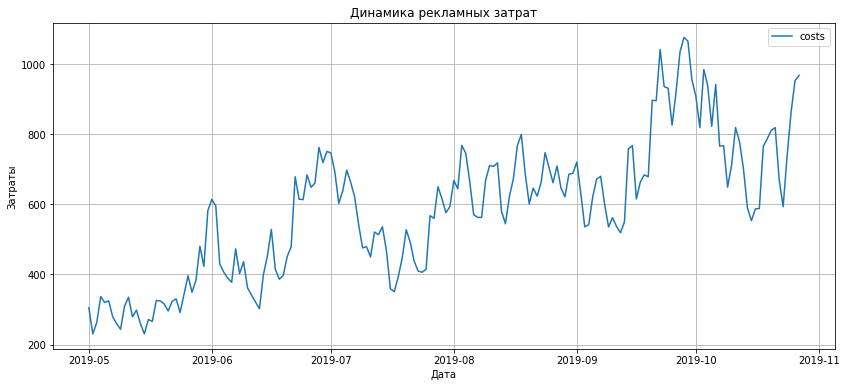

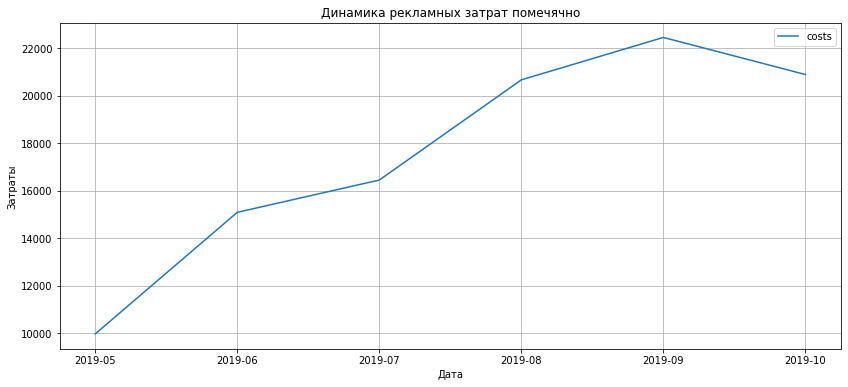

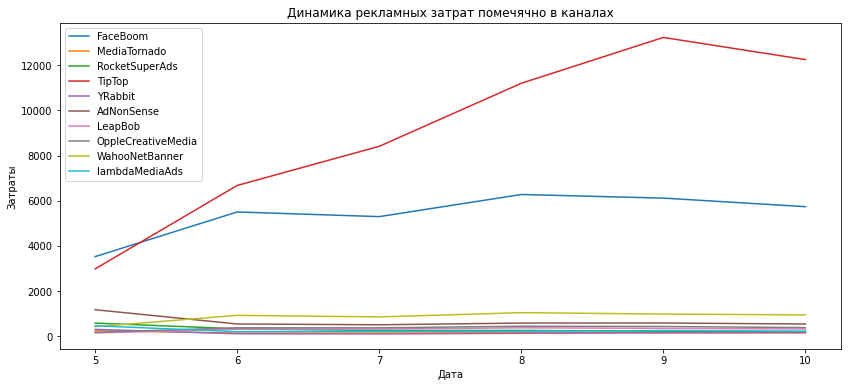

In [19]:
print('Общая сумма расходов на маркетинг: {:0.2f}'.format(costs['costs'].sum()) )


channel_costs = costs.groupby(['channel']).agg({'costs': 'sum'}).reset_index().sort_values('costs', ascending = False)

display(channel_costs)

# Построим график затрат

costs.pivot_table(
    index='dt',  values='costs', aggfunc='sum'
).plot(grid=True, figsize=(14, 6))
plt.ylabel('Затраты')
plt.xlabel('Дата')
plt.title('Динамика рекламных затрат')
plt.show()

# Построим график затрат помечячно

costs.pivot_table(
    index=pd.to_datetime(costs['dt']).dt.strftime("%Y-%m") ,  values='costs', aggfunc='sum'
).plot(grid=True, figsize=(14, 6))
plt.ylabel('Затраты')
plt.xlabel('Дата')
plt.title('Динамика рекламных затрат помечячно')
plt.show()


# Построим график затрат помечячно с разбивкой на каналы

# Добавим функцию, которая будет возвращать сгруппированные по затратам данные
def costs_channel (c):
    prepare = costs[(costs['channel'] == c) & (costs['costs'].isna()==False)]
    res = prepare.pivot_table(index=pd.to_datetime(prepare['dt']).dt.month , values='costs', aggfunc='sum')
    return res

# Построим график
plt.figure(figsize=(14,6))
plt.title('Динамика рекламных затрат помечячно в каналах')
plt.xlabel('Дата')
plt.ylabel('Затраты')

for c in list(costs['channel'].unique()):
    try:
#         print(costs(c)['costs'],c)
        sb.lineplot(data=costs_channel(c)['costs'], label=c).set(rc = {'figure.figsize':(14,6)})
        plt.legend()
    except:
        ''

В основном затраты на рекламу распределены между каналами TipTop и FaceBoom. Траты постоянно растут со множеством выраженных локальных максимумов.

Узнаем, сколько в среднем стоило привлечение одного пользователя из каждого источника. Рассчитаем средний CAC на одного пользователя для всего проекта и для каждого источника трафика, используя профили пользователей.

In [20]:
print('Средний CAC на одного пользователя для всего проекта:', profiles['acquisition_cost'].mean())

display((profiles.groupby(['channel']).agg({'acquisition_cost': 'mean'}).rename(columns={'acquisition_cost': 'cac'}).reset_index()).sort_values('cac'))



Средний CAC на одного пользователя для всего проекта: 0.7032778251826568


,channel,cac
10,organic,0.00
2,LeapBob,0.21
3,MediaTornado,0.22
8,YRabbit,0.22
4,OppleCreativeMedia,0.25
5,RocketSuperAds,0.41
7,WahooNetBanner,0.60
9,lambdaMediaAds,0.72
0,AdNonSense,1.01
1,FaceBoom,1.11


Самый высокий CAC в канале TipTop, с большим отрывом от него идут FaceBoom и AdNonSense.

### Вывод

Общая сумма расходов на маркетинг составила 105497,3. В основном затраты на рекламу распределены между каналами TipTop и FaceBoom. Траты постоянно растут со множеством выраженных локальных максимумов. Средний CAC на одного пользователя для всего проекта около 0.7. Самый высокий CAC в канале TipTop, с большим отрывом от него идут FaceBoom и AdNonSense.

<a id="research"></a>
## 5. Оценка окупаемости рекламы

Проанализируем окупаемость рекламы, используя графики LTV, ROI и CAC. Предположим, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. 

Исключим из данных пользователей с органическим трафиком при оценке окупаемости рекламы.

In [21]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа
profiles = profiles.query('channel != "organic"') # Исключим из данных пользователей с органическим трафиком

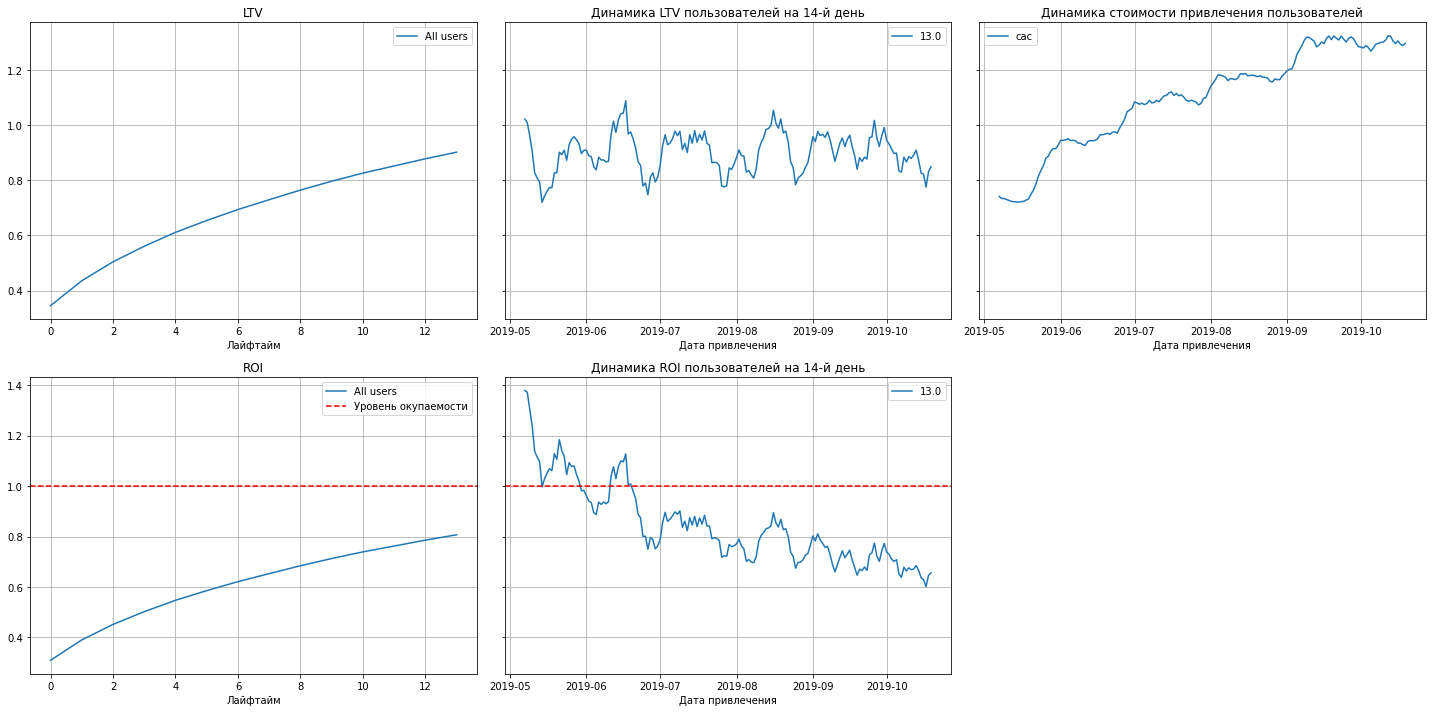

In [22]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно сделать такие выводы:
Реклама не окупается. ROI в конце двухнедельного периода около 80%.
LTV  достаточно стабилен. Видимо, дело не в ухудшении качества пользователей. Для пользователей привлеченных в мае ROI был выше линии окупемости, но с тех пор метрика стабильно ухудшается.
CAC растет с мая 2019. Вероятно, проблема в увеличении рекламного бюджета.


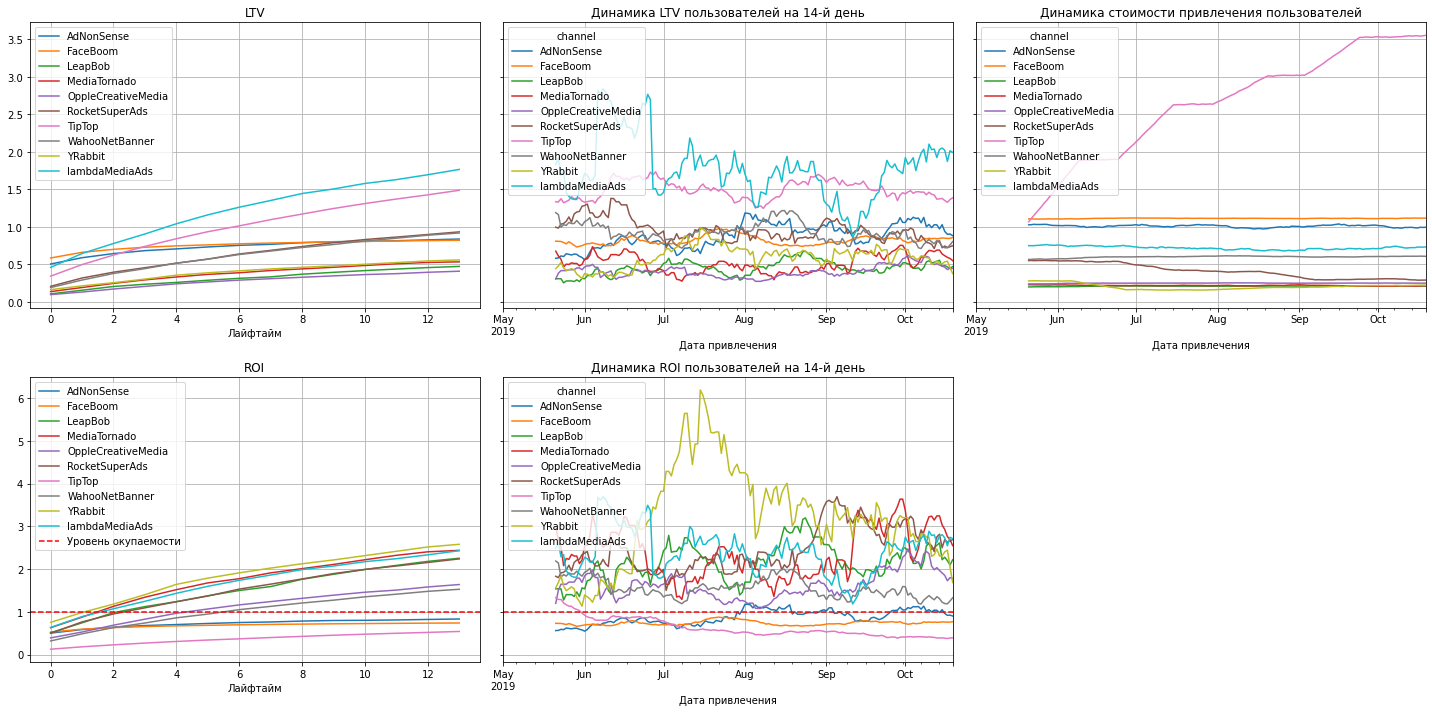

In [23]:
# смотрим окупаемость с разбивкой по каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=21
) 

По графику динамики изменения стоимости видно, что CAC для канала TipTop улетел вверх. Похоже, именно здесь надо искать причины убытков.
По графику ROI также видно, что канал Tip Top тянет статистику вниз. Вместе с ним проблемными являются FaceBoom и AddNonSense, но в гораздо меньшей степени.

Проанализируем окупаемость рекламы с разбивкой по странам.

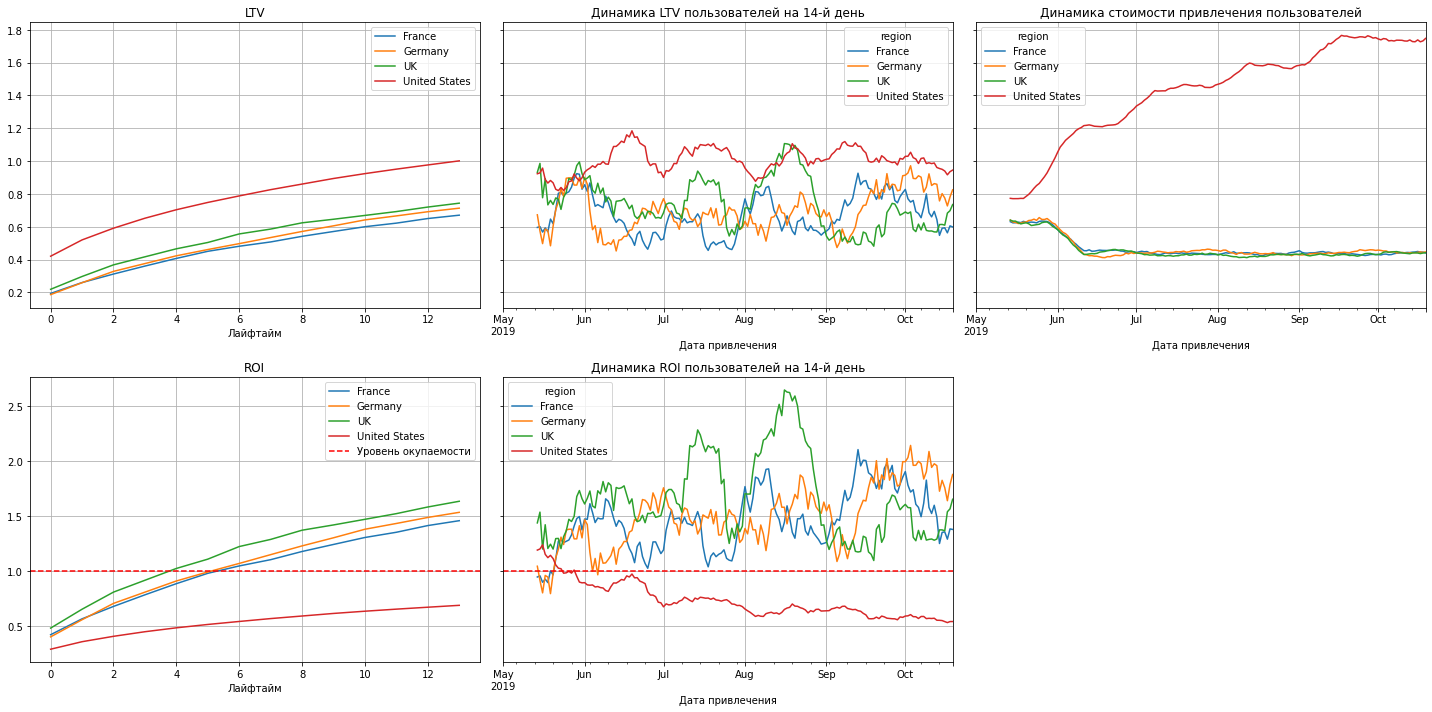

In [24]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По странам график CAC показывает аналогичную картину, похоже основные затраты начали происходить в USA со второй половины мая. Вероятно, по каналу TipTop. А ведь на USA как раз приходится львиная доля траффика. Графики ROI подтверждают, что проблема в траффике из USA.

 Построим и изучим графики конверсии и удержания с разбивкой по устройствам, странам и рекламным каналам.

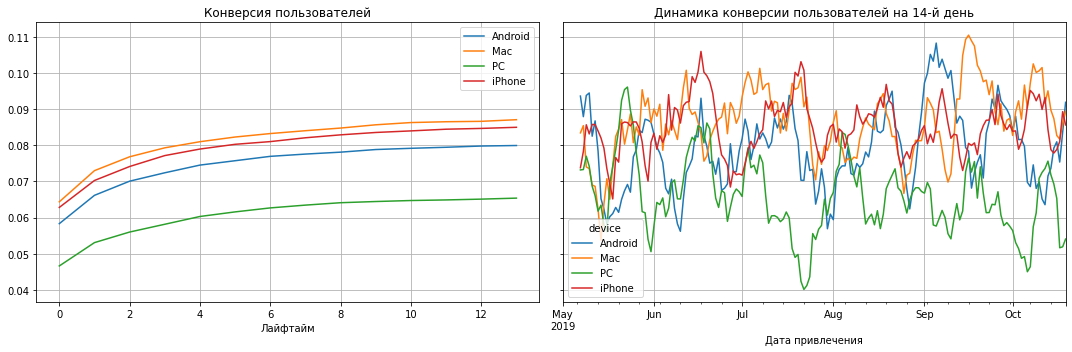

In [25]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, пользователи различных устройств конвертируются стабильно, траффик PC традиционно отстает от других устройств.

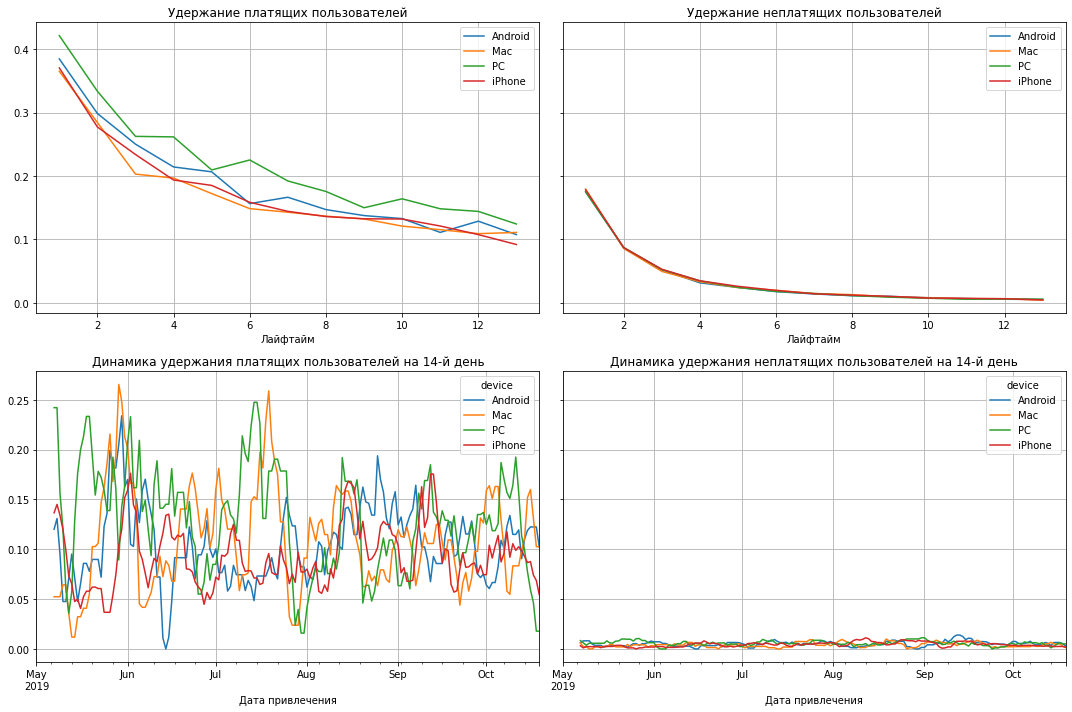

In [26]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание пользователей различных устройств различается не критично, проблема не здесь.

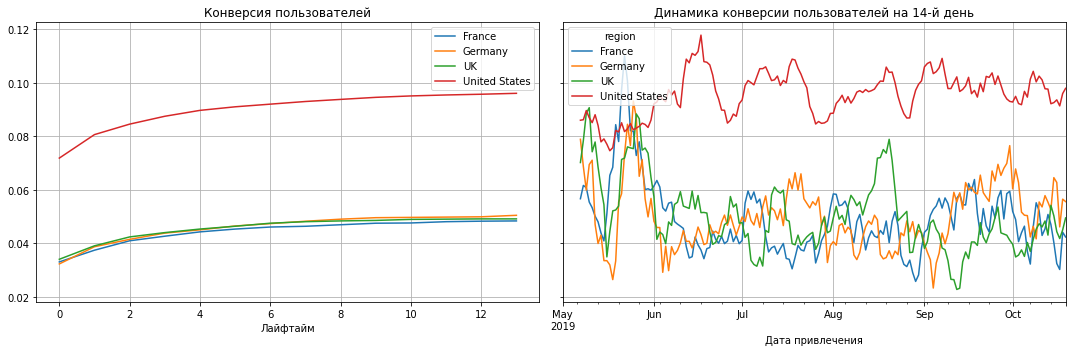

In [27]:
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия USA очень хорошая, в 2 раза выше, чем по другим странам.

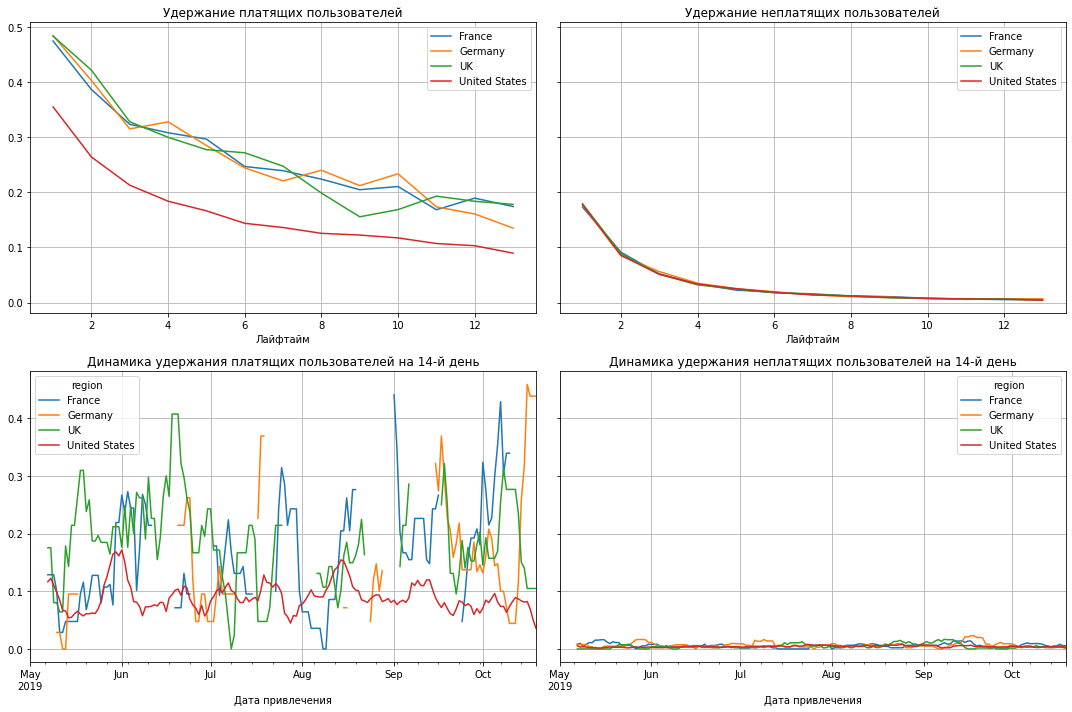

In [28]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Самое низкое удержание в USA.

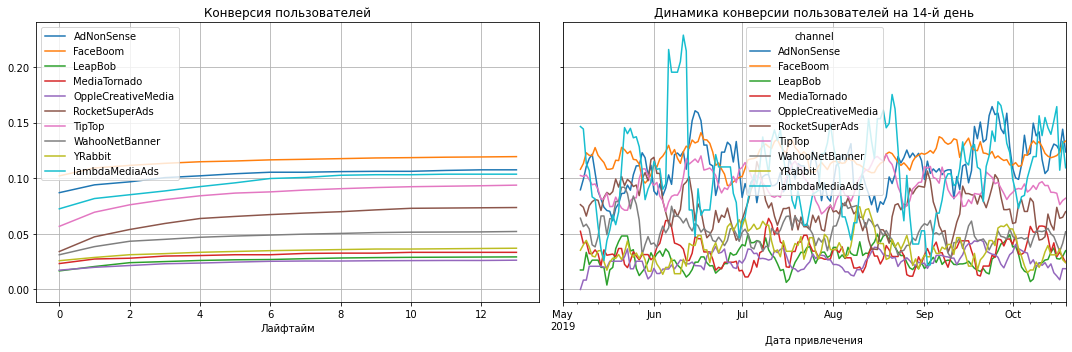

In [29]:
# смотрим общую конверсию с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия относительно стабильна по всем каналам, лидер FaceBoom.

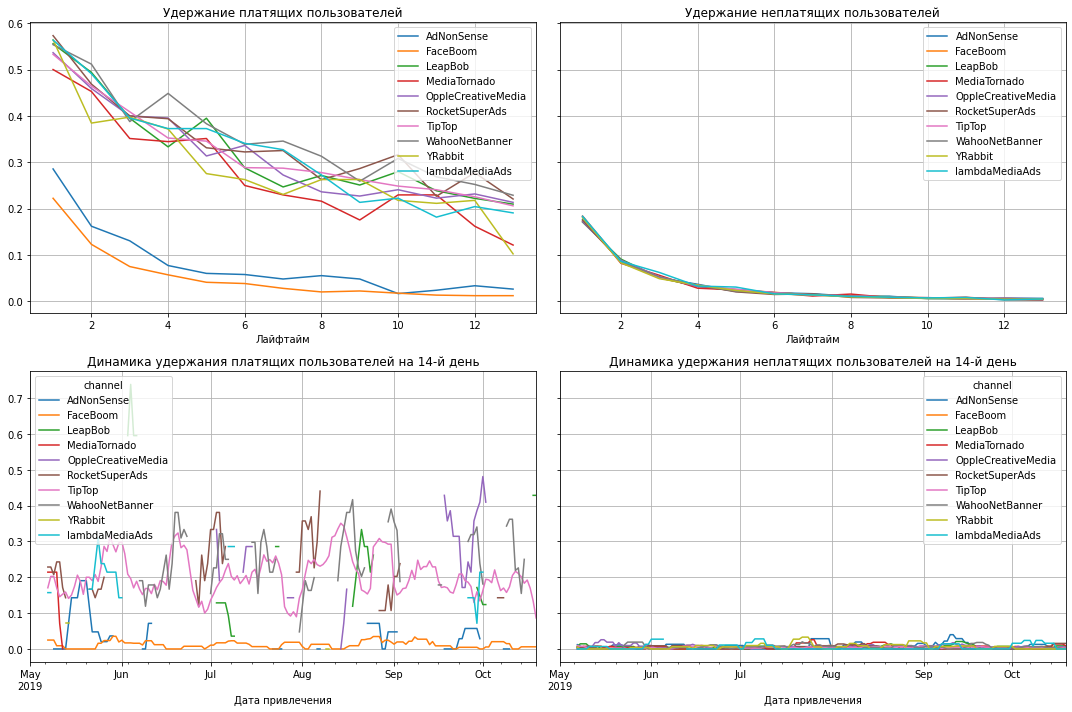

In [30]:
# смотрим общее удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Хуже всего показывает себя удержание платящих пользователей на канале FaceBoom и AdNoneSense.

Посмотрим на конверсию и удержание по каналам в США.

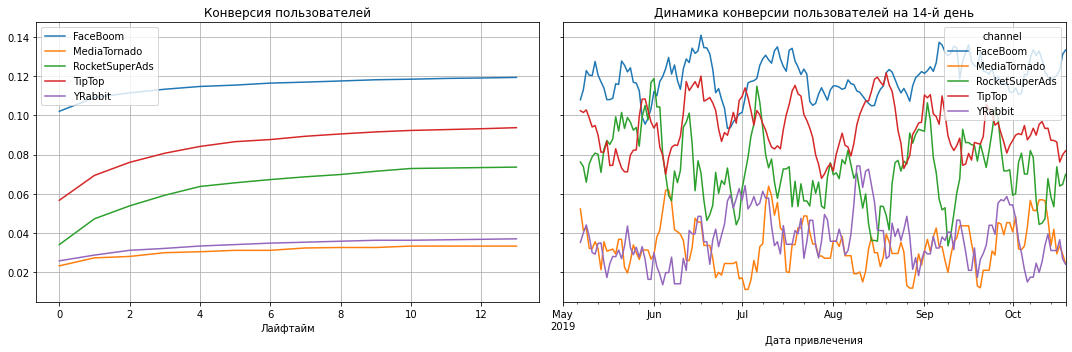

In [31]:
# конверсия

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('region=="United States"'), orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

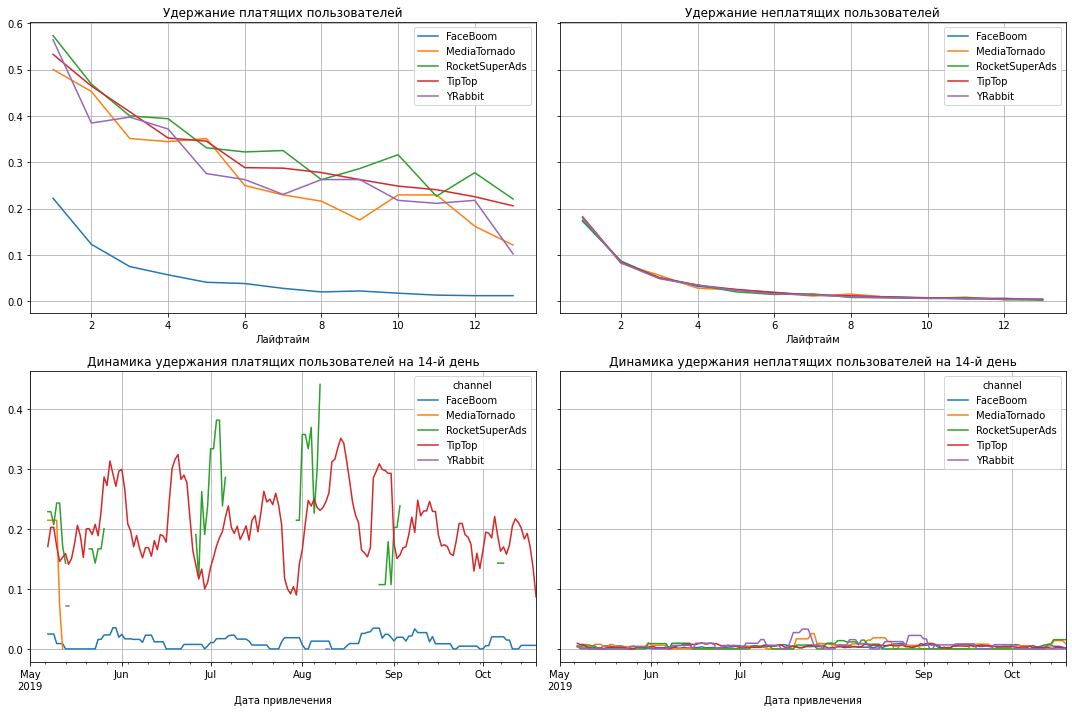

In [32]:
# удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('region=="United States"'), visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

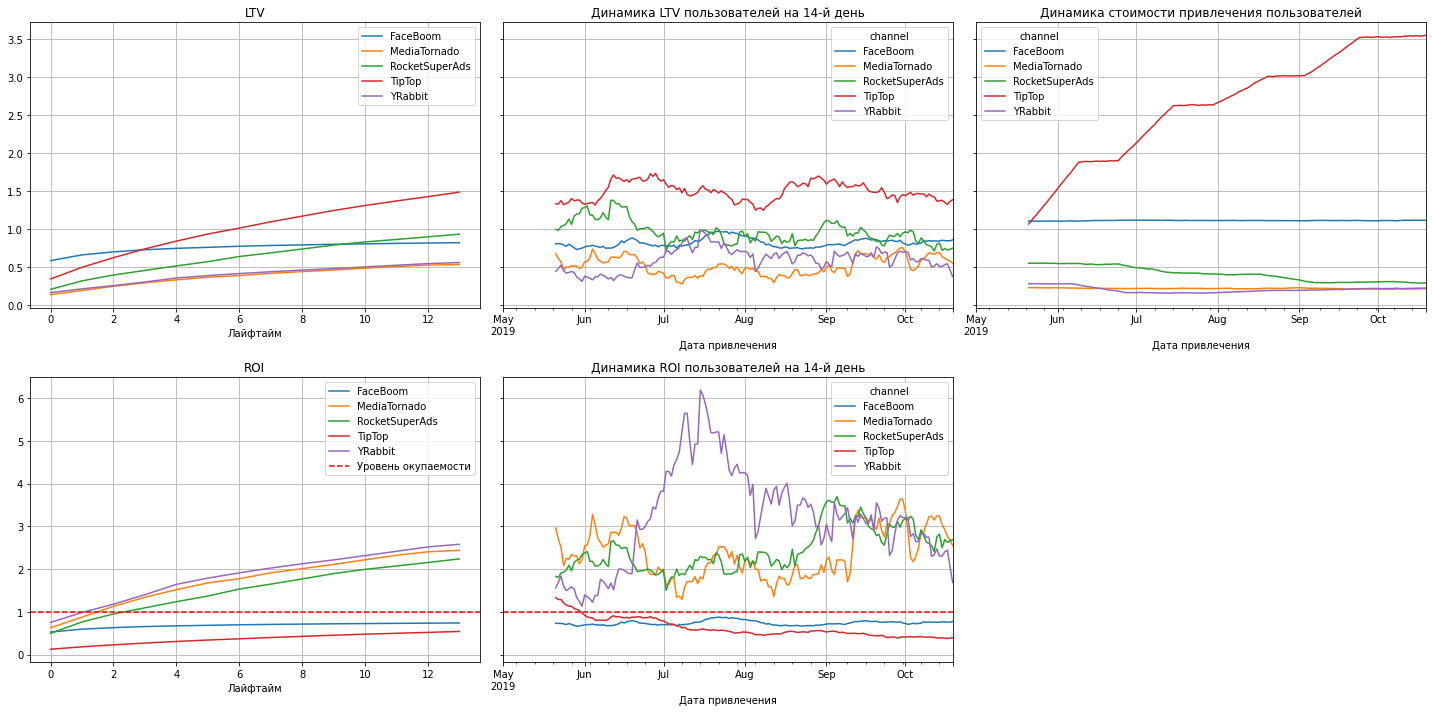

In [33]:
# Посмотрим на окупаемость с разбивкой по каналам в США

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('region=="United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=21
) 

### Вывод
На основании проведенного анализа, можно сказать следующее:
* Реклама в целом не окупается. ROI стабильно падает.
* Основная причина убытков - CAC канала TipTop. Несмотря на огромные затраты на рекламу, этот канал дает самый низкий ROI. Эта проблема наблюдаются по траффику из United States. Еще проблемными в плане окупаемости являются каналы FaceBoom и AddNonSense, но в меньшей степени.
* Проблема окупаемости может быть связана с низким удержанием по каналам FaceBoom и AddNonSense в USA, а также с неадекватными затратами на Tip Top.



<a id="summary"></a>
## 6. Общий вывод

Были открыты и изучены данные маркетинга приложения Procrastinate Pro+.

* Проведена предобработка данных.<br>
* Типы полей были изменены в соответствии с данными в них.<br>
* Названия полей были приведены к нижнему регистру без пробелов.<br>

Для расчета и анализа LTV, ROI, удержания и конверсии были определены соответствующие функции.

Был проведен исследовательский анализ данных:

* Созданы пользовательские профили. Определены минимальная (2019-05-01) и максимальная (2019-10-27) даты привлечения пользователей. 
* Мы выяснили, что наибольший траффик наблюдается из United States, остальные страны (UK, Germany, France) приносят значительно меньше посетителей. Среди платящих (на порядок) лидирует также United States. 
* Большинство посетителей используют iPhone, затем идет Android, Mac и PC. Среди платящих картина аналогичная. 
* Основной траффик наблюдается из бесплатного канала organic, затем идет FaceBoom и TipTop. Среди платящих с большим отрывом лидирует FaceBoom, затем TipTop, на третьем месте organic. Остальные каналы приносят значительно меньше пользователей.

Были рассмотрены данные по расходам на рекламу:

* Общая сумма расходов на маркетинг составила 105497. В основном затраты на рекламу распределены между каналами TipTop и FaceBoom. Траты постоянно растут со множеством выраженных локальных максимумов. 
* Средний CAC на одного пользователя для всего проекта около 0.7. Самый высокий CAC в канале TipTop, с большим отрывом от него идут FaceBoom и AdNonSense.

Бала оценена окупаемость рекламы:

* Реклама в целом не окупается. ROI стабильно падает.
* Основная причина убытков - CAC канала TipTop. Несмотря на огромные затраты на рекламу, этот канал дает самый низкий ROI. Эта проблема наблюдаются по траффику из United States. Еще проблемными в плане окупаемости являются каналы FaceBoom и AddNonSense, но в меньшей степени.
* Проблема окупаемости может быть связана с низким удержанием по стране USA, а также по каналам FaceBoom и AdNoneSense.


Вывод: Основной причиной неэффективности рекламы являются огромные затраты на канал TipTop, который несмотря на высокую конверсию, выдает очень низкий ROI. Также следует обратить внимание на затраты по каналам FaceBoom и AddNonSense, в которых ROI ниже линии окупаемости и низкие показатели удержания. 
Рекомендую перераспределить расходы на рекламу каналов TipTop, FaceBoom и AddNonSense на более перспективные с точки зрения ROI и удержания: YRabbit, MediaTornado и RocketSuperAds.